In [82]:
using DifferentialEquations
using ReactionMechanismSimulator
using PyPlot

In [83]:
outdict1 = readinput("chem43_Ag.rms");
outdict2 = readinput("chem43_Cu.rms")


[17:10:35] WARNING: not removing hydrogen atom without neighbors
[17:10:36] WARNING: not removing hydrogen atom without neighbors
┌ Warning: failed to generate StokesDiffusivity model for species vacantX
└ @ ReactionMechanismSimulator /home/ssun30/RMG-Electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species CO2X
└ @ ReactionMechanismSimulator /home/ssun30/RMG-Electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species CHO2X
└ @ ReactionMechanismSimulator /home/ssun30/RMG-Electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species CO2HX
└ @ ReactionMechanismSimulator /home/ssun30/RMG-Electrocat/ReactionMechanismSimulator.jl/src/Parse.jl:352
┌ Warning: failed to generate StokesDiffusivity model for species OCX
└ @ ReactionMechanismSimulator /home/ssun30/RMG-Electrocat/ReactionMechanismSimulator.j

Dict{Any, Any} with 4 entries:
  "Solvents"              => Solvent[Solvent("water", RiedelViscosity{Float64}(…
  Set(["surface", "gas"]) => Dict{Any, Any}("Reactions"=>ElementaryReaction[vac…
  "gas"                   => Dict{Any, Any}("Species"=>Species[Species{NASA{Emp…
  "surface"               => Dict{Any, Any}("Species"=>Species[Species{NASA{Emp…

In [84]:
liqspcs1 = outdict1["gas"]["Species"];
liqrxns1 = outdict1["gas"]["Reactions"];
surfspcs1 = outdict1["surface"]["Species"];
surfrxns1 = outdict1["surface"]["Reactions"];
interfacerxns1 = outdict1[Set(["surface", "gas"])]["Reactions"];
solv1 = outdict1["Solvents"][1];

In [85]:
liqspcs2 = outdict2["gas"]["Species"];
liqrxns2 = outdict2["gas"]["Reactions"];
surfspcs2 = outdict2["surface"]["Species"];
surfrxns2 = outdict2["surface"]["Reactions"];
interfacerxns2 = outdict2[Set(["surface", "gas"])]["Reactions"];
solv2 = outdict2["Solvents"][1];

In [86]:
sitedensity1 = 2.292e-5; # Ag111
sitedensity2 = 2.943e-5; # Cu111
AVratio = 1.0e5

100000.0

In [87]:
initialcondsliq = Dict(["proton"=>10.0^-4,"CO2"=>10.0^-3*10^3,
        "V"=>1.0,"T"=>298.15,"Phi"=>0.0,"d"=>0.0]);
initialcondssurf1 = Dict(["CO2X"=>0.4*sitedensity1*AVratio,
        "CHO2X"=>0.1*sitedensity1*AVratio,
        "CO2HX"=>0.1*sitedensity1*AVratio,
        "OX"=>0.1*sitedensity1*AVratio,
        "OCX"=>0.1*sitedensity1*AVratio,
        "vacantX"=>0.1*sitedensity1*AVratio,
        "CH2O2X"=>0.05*sitedensity1*AVratio,
        "CHOX"=>0.04*sitedensity1*AVratio,
        "CH2OX"=>0.01*sitedensity1*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.5]);
initialcondssurf2 = Dict(["CO2X"=>0.4*sitedensity1*AVratio,
        "CHO2X"=>0.1*sitedensity1*AVratio,
        "CO2HX"=>0.1*sitedensity1*AVratio,
        "OX"=>0.1*sitedensity1*AVratio,
        "OCX"=>0.1*sitedensity1*AVratio,
        "vacantX"=>0.1*sitedensity1*AVratio,
        "CH2O2X"=>0.05*sitedensity1*AVratio,
        "CHOX"=>0.04*sitedensity1*AVratio,
        "CH2OX"=>0.01*sitedensity1*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.0]);
initialcondssurf3 = Dict(["CO2X"=>0.4*sitedensity1*AVratio,
        "CHO2X"=>0.1*sitedensity1*AVratio,
        "CO2HX"=>0.1*sitedensity1*AVratio,
        "OX"=>0.1*sitedensity1*AVratio,
        "OCX"=>0.1*sitedensity1*AVratio,
        "vacantX"=>0.1*sitedensity1*AVratio,
        "CH2O2X"=>0.05*sitedensity1*AVratio,
        "CHOX"=>0.04*sitedensity1*AVratio,
        "CH2OX"=>0.01*sitedensity1*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-2.0]);
initialcondssurf4 = Dict(["CO2X"=>0.4*sitedensity2*AVratio,
        "CHO2X"=>0.1*sitedensity2*AVratio,
        "CO2HX"=>0.1*sitedensity2*AVratio,
        "OX"=>0.1*sitedensity2*AVratio,
        "OCX"=>0.1*sitedensity2*AVratio,
        "vacantX"=>0.1*sitedensity2*AVratio,
        "CH2O2X"=>0.05*sitedensity2*AVratio,
        "CHOX"=>0.04*sitedensity2*AVratio,
        "CH2OX"=>0.01*sitedensity2*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.5]);
initialcondssurf5 = Dict(["CO2X"=>0.4*sitedensity2*AVratio,
        "CHO2X"=>0.1*sitedensity2*AVratio,
        "CO2HX"=>0.1*sitedensity2*AVratio,
        "OX"=>0.1*sitedensity2*AVratio,
        "OCX"=>0.1*sitedensity2*AVratio,
        "vacantX"=>0.1*sitedensity2*AVratio,
        "CH2O2X"=>0.05*sitedensity2*AVratio,
        "CHOX"=>0.04*sitedensity2*AVratio,
        "CH2OX"=>0.01*sitedensity2*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-1.0]);
initialcondssurf6 = Dict(["CO2X"=>0.4*sitedensity2*AVratio,
        "CHO2X"=>0.1*sitedensity2*AVratio,
        "CO2HX"=>0.1*sitedensity2*AVratio,
        "OX"=>0.1*sitedensity2*AVratio,
        "OCX"=>0.1*sitedensity2*AVratio,
        "vacantX"=>0.1*sitedensity2*AVratio,
        "CH2O2X"=>0.05*sitedensity2*AVratio,
        "CHOX"=>0.04*sitedensity2*AVratio,
        "CH2OX"=>0.01*sitedensity2*AVratio,
        "A"=>1.0*AVratio,"T"=>298.15,"Phi"=>-2.0]);

In [88]:
liq1 = IdealDiluteSolution(liqspcs1,liqrxns1,solv1,name="liquid",diffusionlimited=true);

liq2 = IdealDiluteSolution(liqspcs2,liqrxns2,solv2,name="liquid",diffusionlimited=true);

surf1 = IdealSurface(surfspcs1,surfrxns1,sitedensity1,name="surface");

surf2 = IdealSurface(surfspcs2,surfrxns2,sitedensity2,name="surface");

domainliq1,y0liq1,pliq1 = ConstantTVDomain(phase=liq1,
    initialconds=initialcondsliq,constantspecies=["proton","CO2"]);

domainliq2,y0liq2,pliq2 = ConstantTVDomain(phase=liq2,
    initialconds=initialcondsliq,constantspecies=["proton","CO2"]);

In [89]:
domaincat1,y0cat1,pcat1 = ConstantTAPhiDomain(phase=surf1,
    initialconds=initialcondssurf1);

inter1,pinter1 = ReactiveInternalInterfaceConstantTPhi(domainliq1,
  domaincat1,interfacerxns1,298.15,AVratio*1.0);

In [90]:
domaincat2,y0cat2,pcat2 = ConstantTAPhiDomain(phase=surf1,
    initialconds=initialcondssurf2);

inter2,pinter2 = ReactiveInternalInterfaceConstantTPhi(domainliq1,
  domaincat2,interfacerxns1,298.15,AVratio*1.0);

In [91]:
domaincat3,y0cat3,pcat3 = ConstantTAPhiDomain(phase=surf1,
    initialconds=initialcondssurf3);
    
inter3,pinter3 = ReactiveInternalInterfaceConstantTPhi(domainliq1,
  domaincat3,interfacerxns1,298.15,AVratio*1.0);

In [92]:
domaincat4,y0cat4,pcat4 = ConstantTAPhiDomain(phase=surf2,
    initialconds=initialcondssurf4);
    
inter4,pinter4 = ReactiveInternalInterfaceConstantTPhi(domainliq2,
  domaincat4,interfacerxns2,298.15,AVratio*1.0);

In [93]:
domaincat5,y0cat5,pcat5 = ConstantTAPhiDomain(phase=surf2,
    initialconds=initialcondssurf5);
    
inter5,pinter5 = ReactiveInternalInterfaceConstantTPhi(domainliq2,
  domaincat5,interfacerxns2,298.15,AVratio*1.0);

In [94]:
domaincat6,y0cat6,pcat6 = ConstantTAPhiDomain(phase=surf2,
    initialconds=initialcondssurf6);
    
inter6,pinter6 = ReactiveInternalInterfaceConstantTPhi(domainliq2,
  domaincat6,interfacerxns2,298.15,AVratio*1.0);

In [95]:
@time react1,y01,p1 = Reactor((domainliq1,domaincat1), (y0liq1,y0cat1), (0.0, 1.0e2), [inter1], (pliq1,pcat1,pinter1));

@time sol1 = solve(react1.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys1 = SystemSimulation(sol1,(domainliq1,domaincat1,),(inter1,),p1);


  0.001202 seconds (3.31 k allocations: 960.234 KiB)
  0.105116 seconds (462.72 k allocations: 65.158 MiB, 18.36% gc time)


In [96]:
@time react2,y02,p2 = Reactor((domainliq1,domaincat2), (y0liq1,y0cat2), (0.0, 1.0e2), [inter2], (pliq1,pcat2,pinter2));

@time sol2 = solve(react2.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-12,reltol=1e-6);

ssys2 = SystemSimulation(sol2,(domainliq1,domaincat2,),(inter2,),p2);

  0.001183 seconds (3.31 k allocations: 960.234 KiB)
  0.033939 seconds (133.51 k allocations: 19.993 MiB, 23.54% gc time)



[CVODES ERROR]  CVode
  At t = 1.71566e-13 and h = 2.74651e-20, the error test failed repeatedly or with |h| = hmin.



In [97]:
@time react3,y03,p3 = Reactor((domainliq1,domaincat3), (y0liq1,y0cat3), (0.0, 1.0e2), [inter3], (pliq1,pcat3,pinter3));

@time sol3 = solve(react3.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys3 = SystemSimulation(sol3,(domainliq1,domaincat3,),(inter3,),p3);

  0.001498 seconds (3.31 k allocations: 960.234 KiB)
  0.074664 seconds (341.64 k allocations: 46.424 MiB, 11.17% gc time)



[CVODES ERROR]  CVode
  At t = 15.6322 and h = 5.60371e-09, the error test failed repeatedly or with |h| = hmin.



In [98]:
@time react4,y04,p4 = Reactor((domainliq2,domaincat4), (y0liq2,y0cat4), (0.0, 1.0e2), [inter4], (pliq2,pcat4,pinter4));

@time sol4 = solve(react4.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys4 = SystemSimulation(sol4,(domainliq2,domaincat4,),(inter4,),p4);

  0.001587 seconds (3.66 k allocations: 865.812 KiB)
  0.056727 seconds (266.76 k allocations: 31.517 MiB, 15.80% gc time)


In [99]:
@time react5,y05,p5 = Reactor((domainliq2,domaincat5), (y0liq2,y0cat5), (0.0, 1.0e2), [inter5], (pliq2,pcat5,pinter5));

@time sol5 = solve(react5.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys5 = SystemSimulation(sol5,(domainliq2,domaincat5,),(inter5,),p5);

  0.001386 seconds (3.66 k allocations: 865.812 KiB)
  0.047519 seconds (288.60 k allocations: 33.380 MiB)


In [100]:
@time react6,y06,p6 = Reactor((domainliq2,domaincat6), (y0liq2,y0cat6), (0.0, 1.0e2), [inter6], (pliq2,pcat6,pinter6));

@time sol6 = solve(react6.ode,DifferentialEquations.CVODE_BDF(),abstol=1e-16,reltol=1e-6);

ssys6 = SystemSimulation(sol6,(domainliq2,domaincat6,),(inter6,),p6);

  0.001202 seconds (3.66 k allocations: 865.812 KiB)
  0.053374 seconds (254.13 k allocations: 30.542 MiB, 19.28% gc time)


In [101]:
# Helper function
function plotX1(sim, tol, t_end, exclude)
    clf()
    xs = molefractions(sim)
    maxes = maximum(xs, dims=2)

    # Filter time data up to t_end
    time_indices = findall(t -> t <= t_end, sim.sol.t)
    time_filtered = sim.sol.t[time_indices]
    xs_filtered = xs[:, time_indices]

    for i = 1:length(maxes)
        species_name = sim.domain.phase.species[i].name
        if maxes[i] > tol && !(species_name in exclude)
            plot(time_filtered, xs_filtered[i,:], label=species_name)
        end
    end
    legend()
    xlabel("Time in Sec")
    ylabel("Mole Fraction")
end

plotX1 (generic function with 1 method)

In [130]:
function plotX(bsol, tol, t_end, exclude)
    # Species order and corresponding colors for the main species
    species_order = ["CO2", "proton", "H2", "O=CO", "C=O", "O=CC=O", "O=CCO"]
    color_map = Dict("CO2" => "blue", "proton" => "orange", "H2" => "purple",
                     "O=CO" => "red", "C=O" => "green", "O=CC=O" => "magenta",
                     "O=CCO" => "brown")
    # Replacement map for species labels
    replacement_map = Dict("C=O" => "CH2=O", "O=CO" => "HCOOH",
                           "O=CC=O" => "O=CH-CH=O", "O=CCO" => "O=CH-CH2OH")

    clf()
    
    xs = molefractions(bsol)
    maxes = maximum(xs, dims=2)
    spnames = []
    plotted_species = Set{String}()

    # Filter data to the specified time range
    if t_end !== nothing
        t_mask = bsol.sol.t .<= t_end
        ts = bsol.sol.t[t_mask]
        xs = xs[:, t_mask]
    else
        ts = bsol.sol.t
    end

    # Plot species in the specified order with custom colors and labels
    for sp in species_order
        # Find the species index in the phase
        species_index = findfirst(x -> x.name == sp, bsol.domain.phase.species)
        if species_index === nothing || maxes[species_index] <= tol || sp in exclude
            continue
        end

        # Apply replacement for display name if available
        display_name = get(replacement_map, sp, sp)

        # Plot the species with the specified color
        plot(ts, xs[species_index, :], label=display_name, color=color_map[sp])
        push!(spnames, display_name)
        push!(plotted_species, sp)
    end

    # Plot any remaining species that are above the tolerance and not already plotted
    for i = 1:length(bsol.domain.phase.species)
        sp = bsol.domain.phase.species[i].name
        if maxes[i] > tol && !(sp in exclude) && !(sp in plotted_species)
            plot(ts, xs[i, :], label=sp)
            push!(spnames, sp)
        end
    end

    # Configure the legend and labels
    xlabel("Time in sec", fontsize=16)
    ylabel("Mole Fraction", fontsize=16)
    xticks(fontsize=14)
    yticks(fontsize=14)
    legend(spnames, loc="upper left", bbox_to_anchor=(0, 0.93), fontsize=12, ncol=2)
end

plotX (generic function with 1 method)

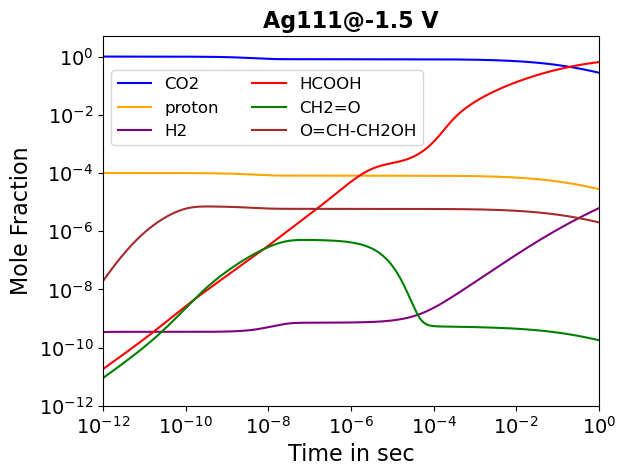

In [132]:
exclude_species = ["H2O"]
plotX(ssys1.sims[1], 1e-12, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1)
ylim(1e-12, 5)
title("Ag111@-1.5 V", fontsize=16, fontweight="bold")
gcf()

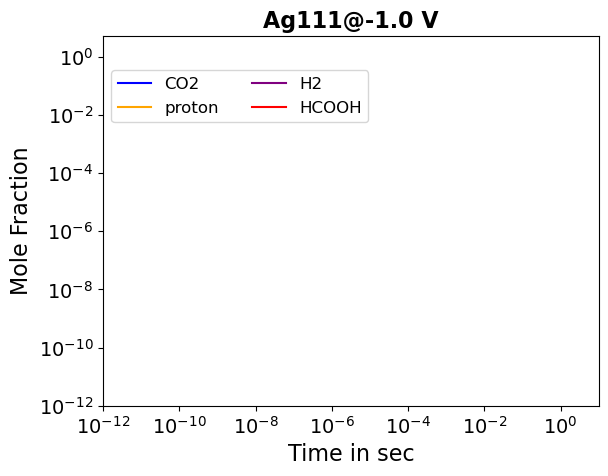

In [133]:
exclude_species = ["H2O"]
plotX(ssys2.sims[1], 1e-10, 10, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 10)
ylim(1e-12, 5)
title("Ag111@-1.0 V", fontsize=16, fontweight="bold")
gcf()

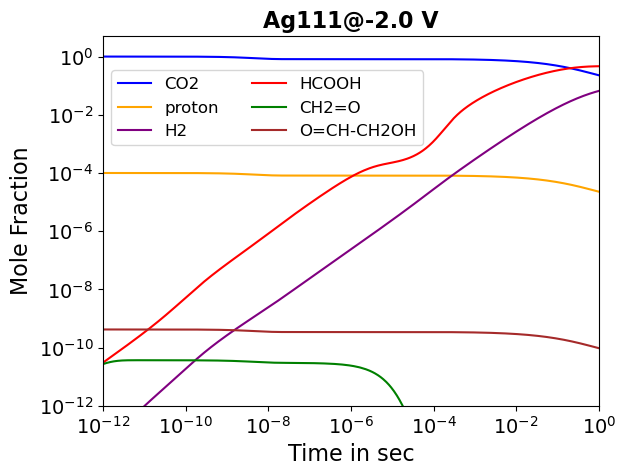

In [134]:
exclude_species = ["H2O"]
plotX(ssys3.sims[1], 1e-12, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1)
ylim(1e-12, 5)
title("Ag111@-2.0 V", fontsize=16, fontweight="bold")
gcf()

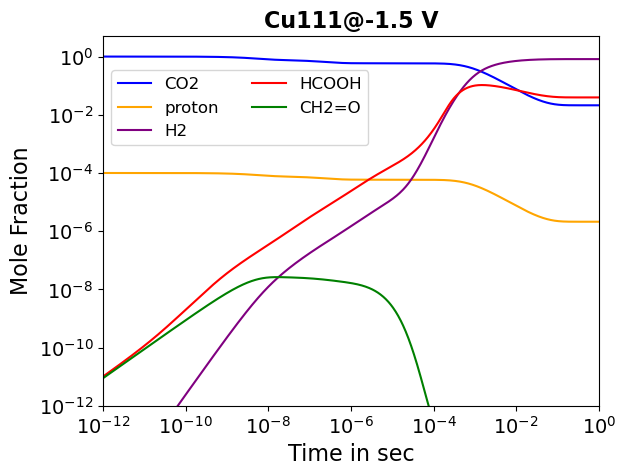

In [135]:
exclude_species = ["H2O"]
plotX(ssys4.sims[1], 1e-12, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1)
ylim(1e-12, 5)
title("Cu111@-1.5 V", fontsize=16, fontweight="bold")
gcf()

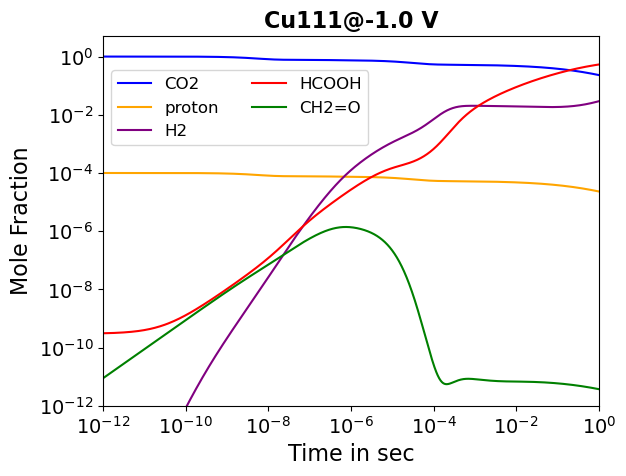

In [136]:
exclude_species = ["H2O"]
plotX(ssys5.sims[1], 1e-12, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1)
ylim(1e-12, 5)
title("Cu111@-1.0 V", fontsize=16, fontweight="bold")
gcf()

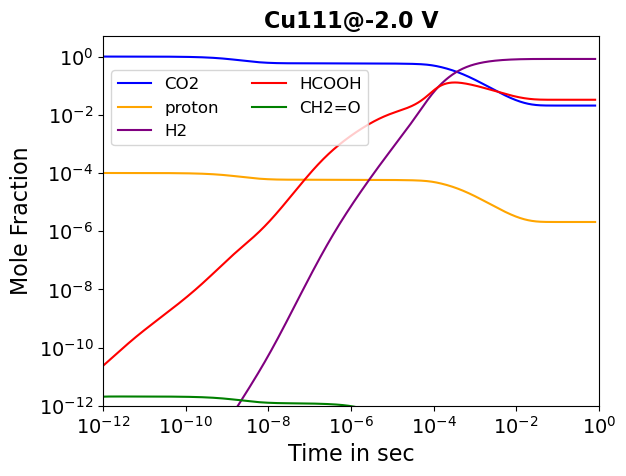

In [137]:
exclude_species = ["H2O"]
plotX(ssys6.sims[1], 1e-12, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1)
ylim(1e-12, 5)
title("Cu111@-2.0 V", fontsize=16, fontweight="bold")
gcf()

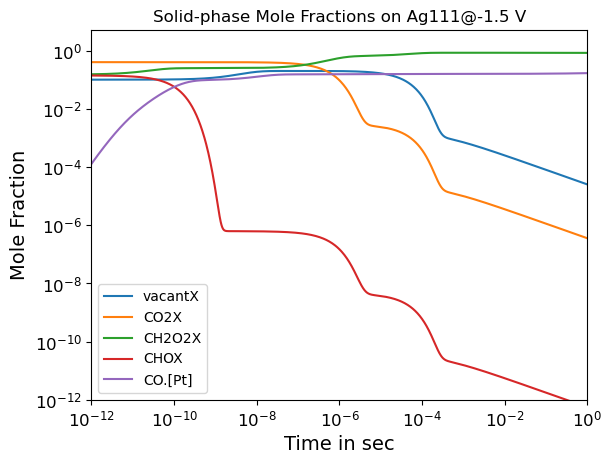

In [109]:
exclude_species = ["H2O"]
plotX(ssys1.sims[2], 0.1, 1, exclude_species)
xscale("log")
yscale("log")
xlim(1e-12, 1)
ylim(1e-12, 5)
title("Solid-phase Mole Fractions on Ag111@-1.5 V", fontsize=16, fontweight="bold")
legend(loc="lower left")
gcf()

In [110]:
Dict([ssys1.sims[1].names[i]=>molefractions(ssys1.sims[1],1)[i] for i in 1:length(ssys1.sims[1].names)])

Dict{String, Float64} with 17 entries:
  "O=CC=O" => 3.45197e-29
  "proton" => 2.7869e-5
  "O=CO"   => 0.646063
  "Ne"     => 0.0
  "COC=O"  => 1.65034e-15
  "[O]C=O" => 2.21457e-42
  "C=O"    => 1.79e-10
  "[CH]=O" => 2.77632e-32
  "CO2"    => 0.27869
  "O=[C]O" => 4.57006e-35
  "N2"     => 0.0
  "O=CCO"  => 2.01266e-6
  "Ar"     => 0.0
  "H2O"    => 0.0752102
  "He"     => 0.0
  "H"      => 5.33777e-37
  "H2"     => 6.18658e-6

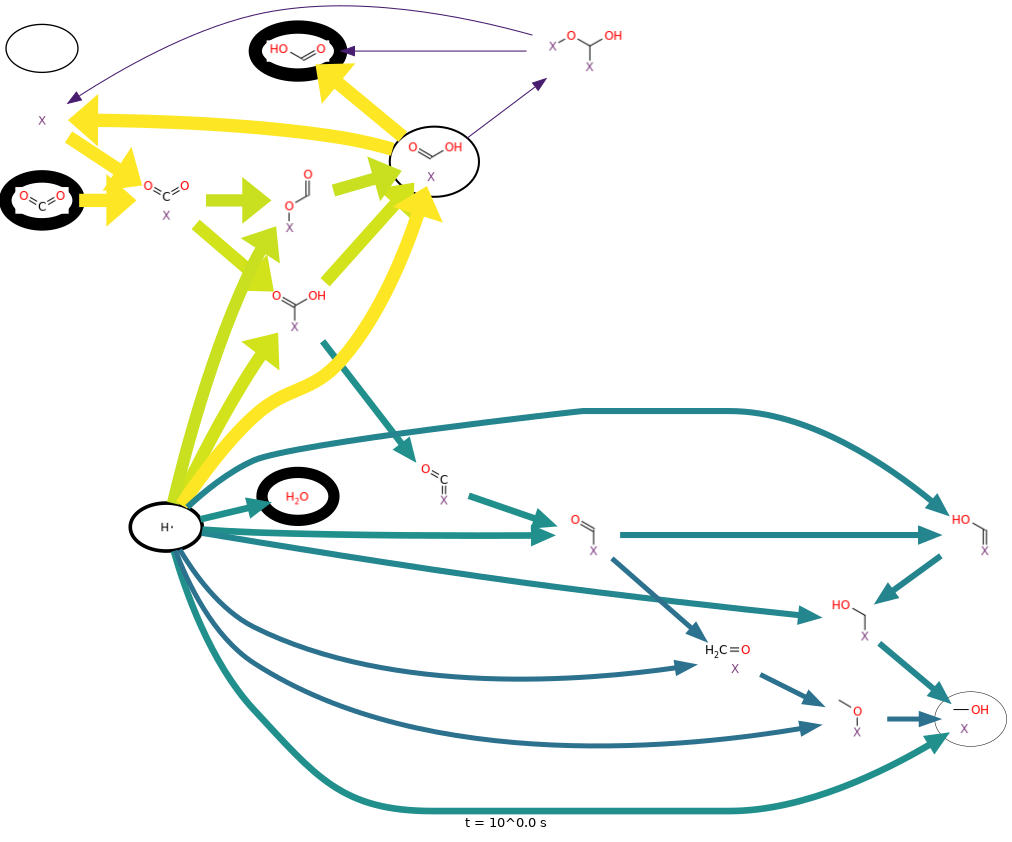

In [121]:
fd1 = getfluxdiagram(ssys1,1;speciesratetolerance=1e-4)

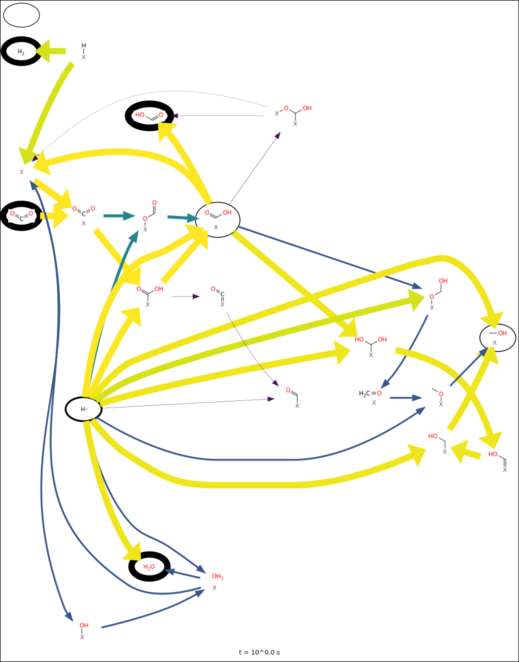

In [122]:
fd3 = getfluxdiagram(ssys3,1;speciesratetolerance=1e-4)

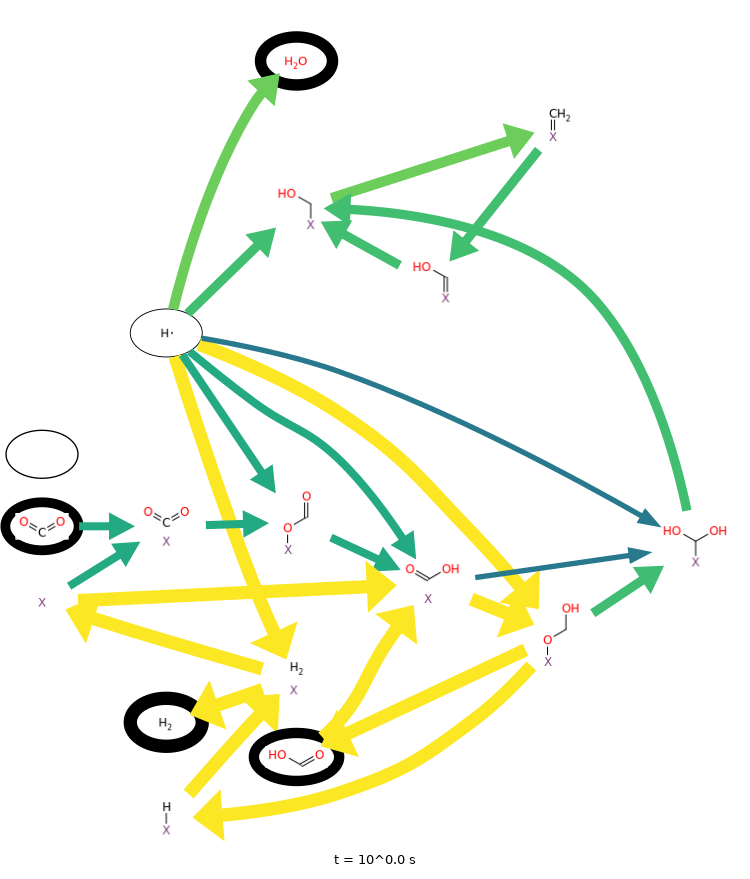

In [123]:
fd4 = getfluxdiagram(ssys4,1;speciesratetolerance=1e-4)

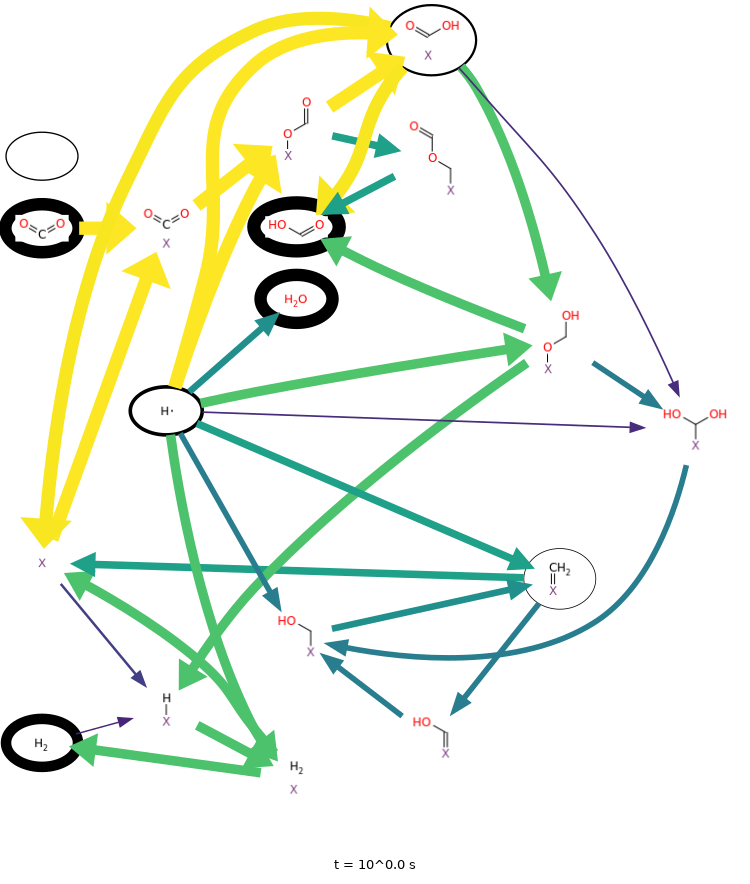

In [124]:
fd5 = getfluxdiagram(ssys5,1;speciesratetolerance=1e-4)

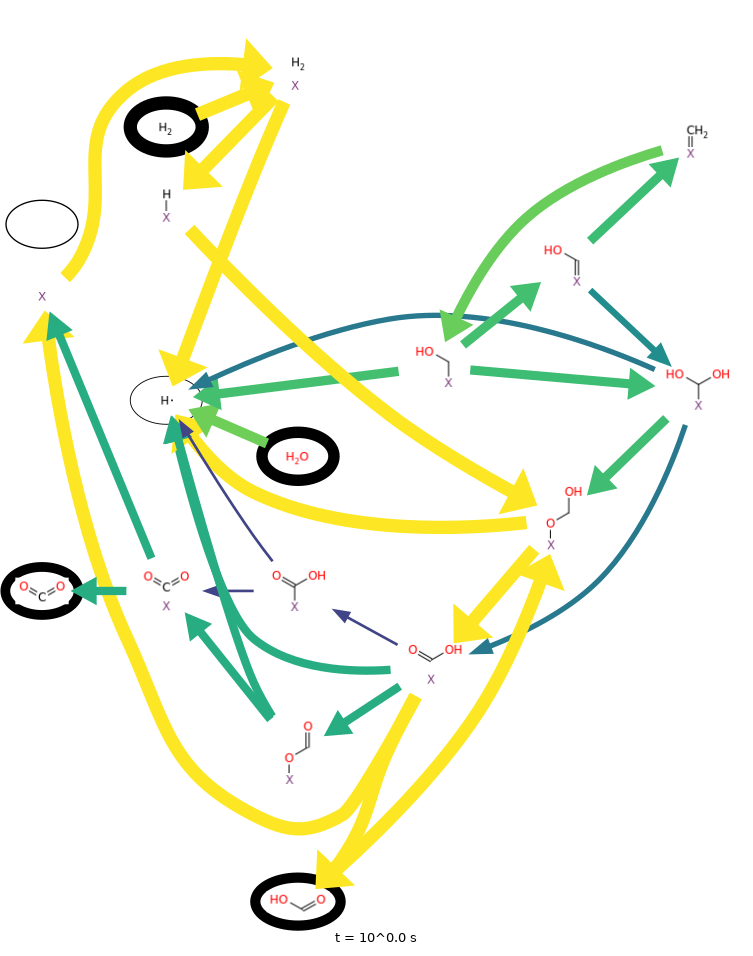

In [125]:
fd6 = getfluxdiagram(ssys6,1;speciesratetolerance=1e-4)

In [116]:
# function plot_composition_comparison(solutions, t, tol, exclude, x_labels)
#     # Prepare data storage
#     species_dict = Dict{String, Vector{Float64}}()  # To collect mole fractions for each species

#     # Iterate through each solution
#     for (idx, bsol) in enumerate(solutions)
#         # Get mole fractions and species at the specified time
#         mole_fractions = molefractions(bsol, t)
#         species = bsol.domain.phase.species

#         # Filter species based on threshold and exclusion list
#         for (i, mf) in enumerate(mole_fractions)
#             species_name = species[i].name
#             if mf > tol && !(species_name in exclude)
#                 # Initialize vector for each species if not already present
#                 if !haskey(species_dict, species_name)
#                     species_dict[species_name] = zeros(length(solutions))
#                 end
#                 # Assign the mole fraction for the current solution
#                 species_dict[species_name][idx] = mf
#             end
#         end
#     end

#     # Convert species data to arrays for plotting
#     species_names = collect(keys(species_dict))
#     num_solutions = length(solutions)

#     # Sort species for each solution based on mole fractions (descending order)
#     sorted_species = sort(species_names, by=name -> -maximum(species_dict[name]))

#     # Plotting each solution individually
#     clf()  # Clear the current figure
#     bar_positions = 1:num_solutions
#     width = 0.35  # Width of each bar
#     color_cycle = get_cmap("tab20", length(sorted_species))

#     # Initialize bottom values for stacked bars
#     bottoms = zeros(num_solutions)

#     # Plot each species, stacking from the highest mole fraction down
#     for (color_idx, species_name) in enumerate(sorted_species)
#         # Get the mole fractions for the current species across solutions
#         current_data = species_dict[species_name]

#         # Plot bars for the current species
#         bar(bar_positions, current_data, width, bottom=bottoms, color=color_cycle(color_idx), label=species_name)

#         # Update the bottom values for stacking
#         bottoms .+= current_data
#     end

#     # Formatting the plot
#     xticks(bar_positions, x_labels)
#     ylabel("Mole Fraction")
#     legend(title="Species", loc="upper right", bbox_to_anchor=(1.2, 1))
#     title("Liquid Phase Composition at t = $t")
#     tight_layout()  # Adjust layout for better appearance
# end


In [117]:
# sims_collection = [ssys1.sims[1], ssys2.sims[1], ssys3.sims[1]]
# x_labels = ["Ag111@-2.0V", "Ag111@-1.5V", "Ag111@-1.0V"]
# plot_composition_comparison(sims_collection, 1e-3, 1e-3, ["H2O"])